In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# option d'affichage des résultats
pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [105]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [106]:
colonnes_montant = ["DEDUPLI", "IDENT", "SommeDeMONTANT_NUM", "Flag_Top_Montant", "NovosScore_Vingtile"]

data_montant_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/DONS_FDF_N_TODAY_1ers_gestes_REF_MD.txt", sep=";", header = 0, low_memory=False, dtype=str) #, dtype=str )#, dtype='Int64')

data_montant_orig.iloc[:,2]=data_montant_orig.iloc[:,2].str.replace(",",".")

data_montant_orig.columns =colonnes_montant
data_montant_orig["SommeDeMONTANT_NUM"]=data_montant_orig["SommeDeMONTANT_NUM"].astype(float)

In [107]:
# importation du fichier (changer le chemin d'accès)
''' Faites attention au type de fichier, au délimiteur des valeurs (ça doit être unique et non multiple),
au header et à la lecture des types d'objets (low_memory) '''

data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_8_new_my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str)#, dtype='Int64')


In [108]:
''' copie superficielle (peu profonde) du dataset original pour ne pas modifier les valeurs
d'origine par erreur plus tard 
'''
data = data_orig.copy()
data.shape

(1192180, 23)

In [109]:
# visualisation des premiers lignes
data.head()


,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,0010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,0010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,0010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,0010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,0010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2


In [318]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        


def evaluation(model, X_train, y_train, X_test, y_test, scoring, plot):

    #model.fit(X_train, y_train)
    y_pred_test = (model.predict(X_test) > 0.5).astype("int64").ravel()
    y_pred_train = (model.predict(X_train) > 0.5 ).astype("int64").ravel()

    y_pred_test = np.where(y_pred_test==0, 2, y_pred_test) 
    y_pred_train = np.where(y_pred_train==0, 2, y_pred_train) 

    y_test = np.where(y_test==0, 2, y_test) 
    y_train = np.where(y_train==0, 2, y_train) 

    print("test",accuracy_score(y_test, y_pred_test)); print("train", accuracy_score(y_train, y_pred_train))

    print("test set : ")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test)) 
    print("train set : ")
    print(confusion_matrix(y_train, y_pred_train )) # ajouter 
    print(classification_report(y_train, y_pred_train ))

    if plot == True:
        N, train_score, val_score = learning_curve(model, X_train, y_train, shuffle=True, cv = 4, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )

        plt.figure(figsize = (10,6))
        plt.plot(N, train_score.mean(axis=1), label ="train_score")
        plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")
        plt.legend()
    else :
        print("GRAPHIQUE NON DEMANDE")

# Comme il n'y a pas de valeurs manquantes (à la place il y a un nombre), le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() #.as_matrix()


def vingtiles(model, data_orig, affichage, save, path): # data_orig est une variables locale (peut être différente au df d'origine)
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe Top_mon)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # vingtiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    #print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #print(df_tous)

    # création de la dernière colonne CLASSE et son remplissage
    index_20_ord = pd.DataFrame(np.unique(df_tous["TRANCHES"])) 
    df_tous["CLASSE"]=df_tous["TRANCHES"].copy()
    ind_val=1
    for kk in range(20):
        df_tous["CLASSE"][df_tous["CLASSE"]== index_20_ord.iloc[kk,0] ] = str(ind_val) 
        ind_val+=1
    print(df_tous)    
    
    # pour la colonne Top_mon : changement de type de variable et remplissage des valeurs (s'il le faut)
    data_temp_t = data_orig.copy()
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t #data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats

    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])
    #print(tab_cross_temp); print("-----------------------")

    # création d'une colonne TOTAL
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)

    # création du tableau final en éliminant la colonne 2
    #tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)

    # si on ne veut pas éliminer la colonne 2
    tab_pour_excel =  tab_cross_temp
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

    return  df_tous


def tableau_5_montant(df_tous, data_montant_orig, affichage, save, path):
    # tableau avec les deux variables qui nous intéressent
    ident_et_montant = data_montant_orig[["IDENT","SommeDeMONTANT_NUM"]]

    # jointure
    tableau_resultats_et_montant = pd.merge(df_tous,ident_et_montant)
    #print(tableau_resultats_et_montant) 

    # on élimine toutes les sommes supérieur à 5000 €
    tableau_resultats_et_montant = tableau_resultats_et_montant[tableau_resultats_et_montant["SommeDeMONTANT_NUM"] <= 5000]
    print(tableau_resultats_et_montant) 
    #print(tableau_resultats_et_montant["TRANCHES"].value_counts())
    #print(pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])))

    # index
    index_temp = pd.DataFrame(np.unique(tableau_resultats_et_montant["TRANCHES"])) 

    # création du tableau qui contiendra les résultats finaux
    tableau_resultats_finaux = pd.DataFrame(columns=["TRANCHES","Moyen_Somme","TOTAL"],index=range(20))
    tableau_resultats_finaux["TRANCHES"] = index_temp

    # remplissage du tableau final
    for k in range(20):
        tableau_resultats_finaux.iloc[k,1] = tableau_resultats_et_montant[tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]]["SommeDeMONTANT_NUM"].mean()
        tableau_resultats_finaux.iloc[k,2] = (tableau_resultats_et_montant["TRANCHES"]==index_temp.iloc[k,0]).sum()
    
    # affichage
    if affichage:        
        print(tableau_resultats_finaux)
    
    # enregistrement sous Excel
    if save:
        tableau_resultats_finaux.to_excel(path)


def vingtiles_ind_sans_target(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    print(df_tous)
    print(df_tous["TRANCHES"].value_counts(ascending = True))

    # GERE L'ORDRE
    patra = np.unique(df_tous.iloc[:,2], return_counts=True)
    df_tranches_sans_target = pd.DataFrame([patra[0],patra[1]]).T
    df_tranches_sans_target.columns=["TRANCHES","COUNTS"]

    # affichage
    if affichage ==True:        
        print(df_tranches_sans_target)
    
    # enregistrement sous Excel
    if save == True:
        df_tranches_sans_target.to_excel(path)
    

# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=[""])
    return data
          


In [317]:

from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score

In [112]:
###########################################################################################################
#                                                   KERAS 
###########################################################################################################


In [113]:
##########################################
# SANS LES VARIABLES CORR  ET ENCODAGE DUMMIES
#########################################

In [114]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])
train_Y_s[train_Y_s==2]=0
train_Y_s[train_Y_s==1]=1

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])
test_Y_s[test_Y_s==2]=0
train_Y_s[train_Y_s==1]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [276]:
"""
import os
%env PYTHONHASHSEED=0
os.environ['PYTHONHASHSEED']=str(0)
"""
import tensorflow as tf
import random 
import keras
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.utils import class_weight 
"""
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
"""

'\nrandom.seed(0)\nnp.random.seed(0)\ntf.random.set_seed(0)\n'

In [299]:


# Create function returning a compiled network

def create_network(number_of_features):
    # numbers of features
    number_of_features = number_of_features  #train_X_s.shape[1]

    # start neural network
    network = models.Sequential()

    # add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=200, activation="tanh", input_shape = (number_of_features, ), kernel_initializer=keras.initializers.glorot_uniform(seed=0) ))

    # add fully connected layer with a ReLu activation function
    network.add(layers.Dense(units=100, activation = "tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=0) ) )

    # add fully connected layer with a ReLu activation function
    network.add(layers.Dense(units=50, activation = "tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=0) ) )    

    # add fully connected layer with a ReLu activation function
    network.add(layers.Dense(units=20, activation = "tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=0) ) )    

    # add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation = "sigmoid", kernel_initializer=keras.initializers.glorot_uniform(seed=0) ) )

    # compile neural network
    network.compile(loss="binary_crossentropy", optimizer ="adam", metrics = ["accuracy"] )


    return network


In [300]:
def plot_graphics(history):
    # get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    # create count of the number of epochs
    epoch_count = range(1, len(training_loss)+1)

    # visualize loss history
    plt.figure(figsize=(8,5))
    plt.plot(epoch_count, training_loss, "r--" )
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # get training and test accuracy histories

    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    plt.figure(figsize=(8,5))
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")
    plt.legend(["Training Accuracy", "Test Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")


In [301]:
# class weight for embalanced data
class_weights = class_weight.compute_class_weight('balanced',np.unique(train_Y_s ),train_Y_s)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.684332948534606, 1: 1.8562415291863346}

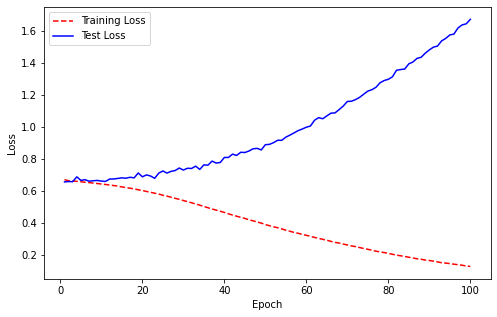

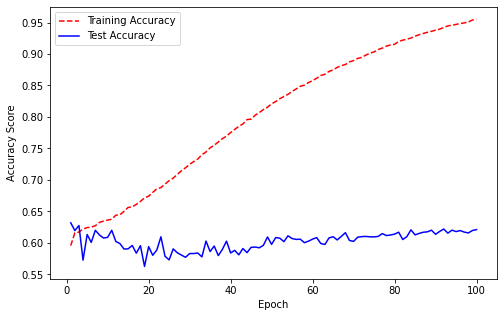

In [302]:
# 
# train neural network
network = create_network( number_of_features=train_X_s.shape[1])
history= network.fit(train_X_s, train_Y_s, epochs=100, verbose=0, batch_size=1024,class_weight=class_weights , validation_data=(test_X_s, test_Y_s))

plot_graphics(history)

Epoch 1/30
78/78 [==============================] - 2s 20ms/step - loss: 0.6757 - accuracy: 0.5817 - val_loss: 0.6557 - val_accuracy: 0.6319
Epoch 2/30
78/78 [==============================] - 1s 16ms/step - loss: 0.6663 - accuracy: 0.6134 - val_loss: 0.6577 - val_accuracy: 0.6196
Epoch 3/30
78/78 [==============================] - 1s 15ms/step - loss: 0.6609 - accuracy: 0.6209 - val_loss: 0.6571 - val_accuracy: 0.6276
Epoch 4/30
78/78 [==============================] - 1s 16ms/step - loss: 0.6596 - accuracy: 0.6238 - val_loss: 0.6872 - val_accuracy: 0.5727
Epoch 5/30
78/78 [==============================] - 1s 16ms/step - loss: 0.6559 - accuracy: 0.6205 - val_loss: 0.6652 - val_accuracy: 0.6134
Epoch 6/30
78/78 [==============================] - 1s 16ms/step - loss: 0.6516 - accuracy: 0.6243 - val_loss: 0.6695 - val_accuracy: 0.6008
Epoch 7/30
78/78 [==============================] - 1s 16ms/step - loss: 0.6490 - accuracy: 0.6311 - val_loss: 0.6601 - val_accuracy: 0.6200
Epoch 8/30
78

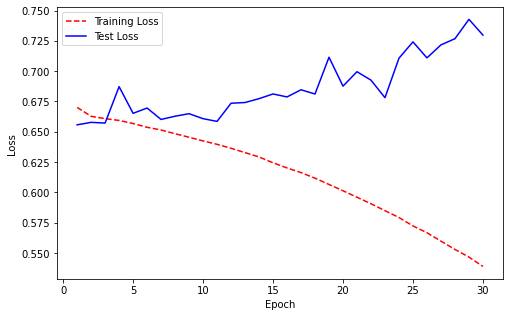

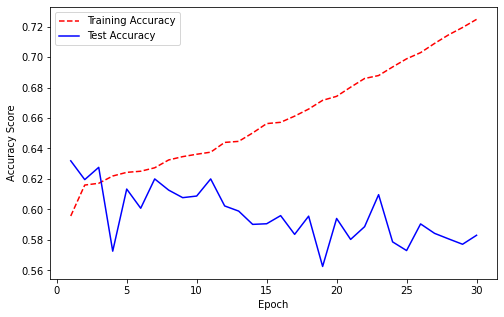

In [314]:
# 
# train neural network
network = create_network( number_of_features=train_X_s.shape[1])
history= network.fit(train_X_s, train_Y_s, epochs=30, verbose=1, batch_size=1024,class_weight=class_weights , validation_data=(test_X_s, test_Y_s))

plot_graphics(history)

In [321]:
network = create_network( number_of_features=train_X_s.shape[1])
history= network.fit(train_X_s, train_Y_s, epochs=3, verbose=1, batch_size=1024,class_weight=class_weights , validation_data=(test_X_s, test_Y_s))

evaluation(network, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

Epoch 1/3
78/78 [==============================] - 2s 20ms/step - loss: 0.6757 - accuracy: 0.5817 - val_loss: 0.6557 - val_accuracy: 0.6319
Epoch 2/3
78/78 [==============================] - 1s 16ms/step - loss: 0.6663 - accuracy: 0.6134 - val_loss: 0.6577 - val_accuracy: 0.6196
Epoch 3/3
78/78 [==============================] - 1s 16ms/step - loss: 0.6609 - accuracy: 0.6209 - val_loss: 0.6571 - val_accuracy: 0.6276
test 0.627643504531722
train 0.6384133138627323
test set : 
[[2831 2500]
 [4895 9634]]
              precision    recall  f1-score   support

           1       0.37      0.53      0.43      5331
           2       0.79      0.66      0.72     14529

    accuracy                           0.63     19860
   macro avg       0.58      0.60      0.58     19860
weighted avg       0.68      0.63      0.65     19860

train set : 
[[11419  9978]
 [18745 39294]]
              precision    recall  f1-score   support

           1       0.38      0.53      0.44     21397
           2 

In [309]:
# TRAIN SET TEST SET
vingtiles_tableau = vingtiles(model= network, data_orig= data, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/train_test_Keras.xlsx")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


            IDENT     PROBA
37148  0010361756  0.181700
34269  0010358714  0.184192
30582  0010350941  0.184366
40058  0010364995  0.184645
36819  0010361425  0.188408
...           ...       ...
99283  0010539458  0.894062
60221  0010392936  0.894945
83624  0010504178  0.895837
77220  0010412631  0.895837
82851  0010500476  0.895837

[99296 rows x 2 columns]
0.888343    49
0.734548    28
0.642364    23
0.808212    19
0.701075    19
            ..
0.663088     1
0.458820     1
0.290965     1
0.494045     1
0.486457     1
Name: PROBA, Length: 96203, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            IDENT     PROBA        TRANCHES CLASSE
37148  0010361756  0.181700  (0.181, 0.309]      1
34269  0010358714  0.184192  (0.181, 0.309]      1
30582  0010350941  0.184366  (0.181, 0.309]      1
40058  0010364995  0.184645  (0.181, 0.309]      1
36819  0010361425  0.188408  (0.181, 0.309]      1
...           ...       ...             ...    ...
99283  0010539458  0.894062  (0.709, 0.896]     20
60221  0010392936  0.894945  (0.709, 0.896]     20
83624  0010504178  0.895837  (0.709, 0.896]     20
77220  0010412631  0.895837  (0.709, 0.896]     20
82851  0010500476  0.895837  (0.709, 0.896]     20

[99296 rows x 4 columns]
Top_mon            1     2  TOTAL
TRANCHES                         
(0.181, 0.309]   560  4405   4965
(0.309, 0.337]   729  4236   4965
(0.337, 0.358]   832  4133   4965
(0.358, 0.377]   828  4137   4965
(0.377, 0.393]   928  4036   4964
(0.393, 0.408]   999  3966   4965
(0.408, 0.422]  1074  3891   4965
(0.422, 0.437]  1105  3860   4965
(0.437, 0.451]  1096  

In [310]:
# TABLEAU MONTANT
tableau_5_montant(vingtiles_tableau, data_montant_orig, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/montant_Neural_Net.xlsx")

            IDENT     PROBA        TRANCHES CLASSE  SommeDeMONTANT_NUM
0      0010361756  0.181700  (0.181, 0.309]      1                15.0
1      0010358714  0.184192  (0.181, 0.309]      1                20.0
2      0010350941  0.184366  (0.181, 0.309]      1                20.0
3      0010364995  0.184645  (0.181, 0.309]      1                25.0
4      0010361425  0.188408  (0.181, 0.309]      1                30.0
...           ...       ...             ...    ...                 ...
99291  0010539458  0.894062  (0.709, 0.896]     20              1917.6
99292  0010392936  0.894945  (0.709, 0.896]     20                25.0
99293  0010504178  0.895837  (0.709, 0.896]     20                20.0
99294  0010412631  0.895837  (0.709, 0.896]     20              2400.0
99295  0010500476  0.895837  (0.709, 0.896]     20                10.0

[99146 rows x 5 columns]
          TRANCHES Moyen_Somme TOTAL
0   (0.181, 0.309]      26.152  4964
1   (0.309, 0.337]     27.8191  4964
2   (0.337,

In [311]:
2852/4965 , 2954/4965, 2310/4965

(0.5744209466263847, 0.5949647532729103, 0.4652567975830816)

In [ ]:
#k-fold cross-validation neural networks ( FOR SMALLER DATA )

# wrap Keras model so it can be used by scikit-learn 
neural_network = KerasClassifier(build_fn =lambda:create_network(number_of_features=train_X_s.shape[1]), epochs=15, batch_size=1024, verbose=0)

# evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, train_X_s, train_Y_s, cv = 10, n_jobs=2, scoring="accuracy")



array([0.74005539, 0.73653072, 0.74043303, 0.73564955, 0.73376133,
       0.73074018, 0.72869193, 0.73448319, 0.74065215, 0.73712703])

In [ ]:
101692-6780*14

6772

In [ ]:
####################################################################################################
#
#                                       UNDER-SAMPLING  ET OVER-SAMPLING (MODIFIER)
#
####################################################################################################

In [ ]:
# Résultat du traitement sur le train set (under-sampling et over-sampling)
abc_test = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/sans_val_corr_spad_under_over_sampling.txt", delim_whitespace="\t", header = None, low_memory=False, dtype="Int64" ) #, dtype='Int64')
abc_np = abc_test.to_numpy(dtype="Int64")

X_resampled = abc_np[:,:-1]
y_resampled = abc_np[:, abc_np.shape[1] -1 ]
y_resampled[y_resampled==2]=0
y_resampled[y_resampled==1]=1


In [ ]:
X_resampled.shape, y_resampled.shape

((160026, 269), (160026,))

Text(0, 0.5, 'Accuracy Score')

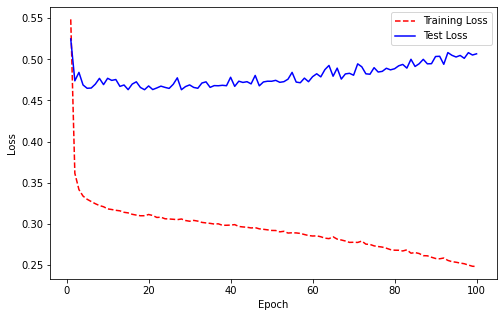

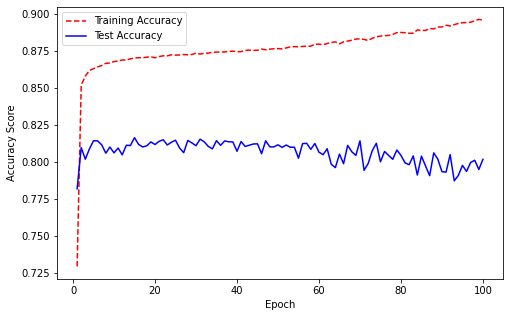

In [ ]:
# 
# train neural network
network = create_network( number_of_features = X_resampled.shape[1])
history= network.fit( X_resampled, y_resampled, epochs=100, verbose=0, batch_size=6780, validation_data=(test_X_s, test_Y_s))

# get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

# visualize loss history
plt.figure(figsize=(8,5))
plt.plot(epoch_count, training_loss, "r--" )
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

# get training and test accuracy histories

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(8,5))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")


In [ ]:
network = create_network( number_of_features = X_resampled.shape[1])
history= network.fit( X_resampled, y_resampled, epochs=1, verbose=0, batch_size=6780, validation_data=(test_X_s, test_Y_s))
evaluation(network, X_resampled, y_resampled, test_X_s, test_Y_s, scoring="recall", plot=False)

test set : 
[[18935  1809]
 [ 3712   967]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     20744
           1       0.35      0.21      0.26      4679

    accuracy                           0.78     25423
   macro avg       0.59      0.56      0.57     25423
weighted avg       0.75      0.78      0.76     25423

train set : 
[[73338  6675]
 [17999 62014]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     80013
           1       0.90      0.78      0.83     80013

    accuracy                           0.85    160026
   macro avg       0.85      0.85      0.85    160026
weighted avg       0.85      0.85      0.85    160026

GRAPHIQUE NON DEMANDE


array([2, 1, 2, ..., 1, 1, 1])

In [ ]:
#k-fold cross-validation neural networks ( FOR SMALLER DATA )

# wrap Keras model so it can be used by scikit-learn 
neural_network = KerasClassifier(build_fn =lambda:create_network(number_of_features=X_resampled.shape[1]), epochs=100, batch_size=6780, verbose=0)

# evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, X_resampled, y_resampled, cv = 4, n_jobs=2)



array([0.74496961, 0.79521084, 0.87861818, 0.97575366])

In [ ]:
# wrap keras model s
neural_network = KerasClassifier(build_fn = create_network, verbose =0)

# create hyperparameters 
hyperparameters = {optimizer = ["rmsprop", "adam"] , epochs = [5, 10], batch_size = [5, 10, 100]   }

grid = GridSearchCV(estimator = neural_network, param_grid=hyperparameters)

result = grid.fit( , )

result.best_params_

In [221]:
if os.environ.get("PYTHONHASHSEED") != "0":
    raise Exception("You must set PYTHONHASHSEED=0 when starting the Jupyter server to get reproducible results.")